In [1]:
import torch
from src.dataloader.challenge_one_dataloader import Sat2RadDataset
from tqdm import tqdm


NUM_SAMPELS = 1000
ds = Sat2RadDataset()

X_maxs  = []
y_maxs  = []
targets = []

for i in tqdm(range(NUM_SAMPELS)):
    item  = ds[i]
    X, y = item["X"], item["y"]
    y_reg = y.squeeze(1)
    y_reg = y_reg.sum(dim=(1, 2)) # [T]; cummulative 15M rainfall
    y_reg = y_reg * 4             # [T]; cummulative 1H rainfall
    y_reg = y_reg.mean()          # [T]; average cummulative 1H rainfall
    targets.append(y_reg.item())

100%|██████████| 1000/1000 [01:48<00:00,  9.19it/s]


In [2]:
max(targets)

536120.9375

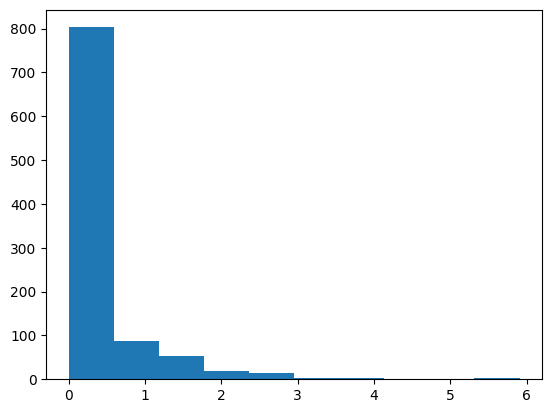

In [15]:
import matplotlib.pyplot as plt

plt.hist(targets);

(array([96.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.        ,  52.25200272, 104.50400543, 156.75601196,
        209.00801086, 261.26000977, 313.51202393, 365.76400757,
        418.01602173, 470.26803589, 522.52001953]),
 <BarContainer object of 10 artists>)

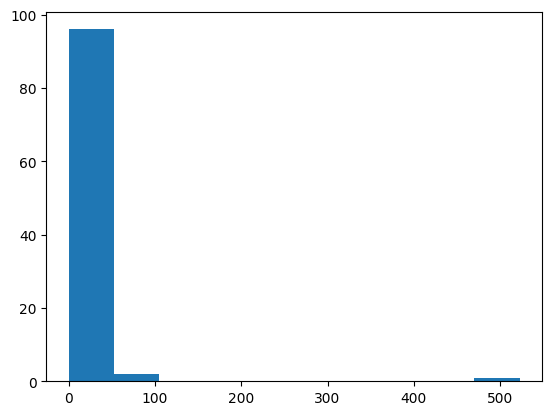

In [9]:
plt.hist(y_maxs)